In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from LogisticRegression import LogisticRegression

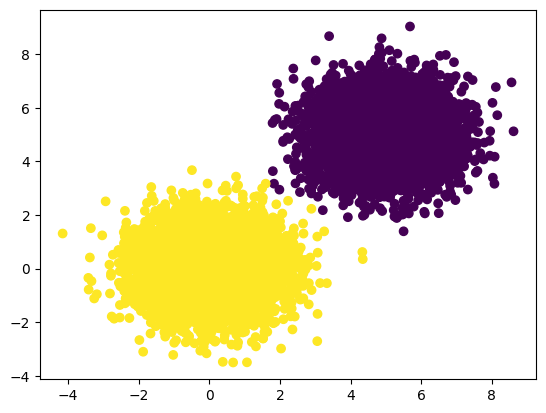

In [22]:
X = np.random.randn(10000,2)
y = np.ones(10000) 

y[:5000] *= -1
X[:5000] += 5

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [23]:
model = LogisticRegression(alpha=1e-4, max_iter=10000)
w,b,loss = model.fit_gd(X, y)

print("Final weights: ", w)
print("Final bias: ", b)
print("Final loss: ", loss[-1])

Final weights:  [-2.27350723 -2.62187119]
Final bias:  12.046048889563274
Final loss:  0.0013162225649145526


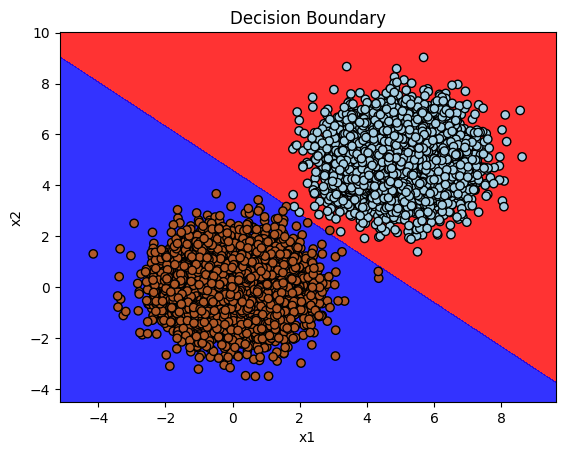

In [24]:
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Calculate the decision boundary
Z = w[0] * xx + w[1] * yy + b
Z = np.sign(Z)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, levels=[-1, 0, 1], colors=['red', 'blue'], linestyles=['--'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.title("Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()